In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

2)
$$H = J \cdot \sum_{j} \, \Big(S_j^x S_{j+1}^x + S_j^y S_{j+1}^y + S_j^z S_{j+1}^z -\frac{1}{4} \Big) + h \sum_j \Big [S_j^x \cos{(j \cdot \phi)} - S_j^y \sin{(j \cdot \phi)} \Big ]$$
gdzie: $\phi = \frac{2 \pi }{N} \cdot (N-1)$

In [2]:
def Sx(N, h, Jx, Jy, Jz, psi0, tlist, gamma, solver,phi):

    si = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()

    sx_list = []
    sy_list = []
    sz_list = []

    for n in range(N):
        op_list = []
        for m in range(N):
            op_list.append(si)

        op_list[n] = sx
        sx_list.append(tensor(op_list))

        op_list[n] = sy
        sy_list.append(tensor(op_list))

        op_list[n] = sz
        sz_list.append(tensor(op_list))

    # Hamiltonian
    H = 0

    # energy splitting terms
    for n in range(N):
        H +=  0.5 * h[n] * (sx_list[n]*np.cos(n*phi)-sy_list[n]*np.sin(n*phi))

    # interaction terms
    for n in range(N-1):
        H +=  0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H +=  0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H +=  0.5 * Jz[n] *( sz_list[n] * sz_list[n+1] - 0.25)

    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sx_list[n])

    # evolve and calculate expectation values
    if solver == "me":
        result = mesolve(H, psi0, tlist, c_op_list, sx_list)
    elif solver == "mc":
        ntraj = 250 
        result = mcsolve(H, psi0, tlist, c_op_list, sx_list, ntraj)

    return result.expect

In [3]:
def Sy(N, h, Jx, Jy, Jz, psi0, tlist, gamma, solver,phi):

    si = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()

    sx_list = []
    sy_list = []
    sz_list = []

    for n in range(N):
        op_list = []
        for m in range(N):
            op_list.append(si)

        op_list[n] = sx
        sx_list.append(tensor(op_list))

        op_list[n] = sy
        sy_list.append(tensor(op_list))

        op_list[n] = sz
        sz_list.append(tensor(op_list))

    # Hamiltonian
    H = 0

    # energy splitting terms
    for n in range(N):
        H +=  0.5 * h[n] * (sx_list[n]*np.cos(n*phi)-sy_list[n]*np.sin(n*phi))

    # interaction terms
    for n in range(N-1):
        H +=  0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H +=  0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H +=  0.5 * Jz[n] *( sz_list[n] * sz_list[n+1] - 0.25)

    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sy_list[n])

    # evolve and calculate expectation values
    if solver == "me":
        result = mesolve(H, psi0, tlist, c_op_list, sy_list)
    elif solver == "mc":
        ntraj = 250 
        result = mcsolve(H, psi0, tlist, c_op_list, sy_list, ntraj)

    return result.expect

In [4]:
def Sz(N, h, Jx, Jy, Jz, psi0, tlist, gamma, solver, phi):

    si = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()

    sx_list = []
    sy_list = []
    sz_list = []

    for n in range(N):
        op_list = []
        for m in range(N):
            op_list.append(si)

        op_list[n] = sx
        sx_list.append(tensor(op_list))

        op_list[n] = sy
        sy_list.append(tensor(op_list))

        op_list[n] = sz
        sz_list.append(tensor(op_list))

    # Hamiltonian
    H = 0

    # energy splitting terms
    for n in range(N):
        H +=  0.5 * h[n] * (sx_list[n]*np.cos(n*phi)-sy_list[n]*np.sin(n*phi))

    # interaction terms
    for n in range(N-1):
        H +=  0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H +=  0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H +=  0.5 * Jz[n] *( sz_list[n] * sz_list[n+1] - 0.25)

    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sz_list[n])

    # evolve and calculate expectation values
    if solver == "me":
        result = mesolve(H, psi0, tlist, c_op_list, sz_list)
    elif solver == "mc":
        ntraj = 250 
        result = mcsolve(H, psi0, tlist, c_op_list, sz_list, ntraj)

    return result.expect

In [5]:
# use the ode solver
solver = "me"   
# use the monte-carlo solver
#solver = "mc"   

N = 4       # number of spins

h = 0.05*np.ones(N)
Jx = 1*np.ones(N)
Jy = 1*np.ones(N)
Jz = 1*np.ones(N)

# dephasing rate
gamma = np.zeros(N)

# intial state
psi_list = []
psi_list.append(basis(2,0))
psi_list.append(basis(2,0))
psi_list.append(basis(2,0))
psi_list.append(basis(2,0))

psi0 = tensor(psi_list)

tlist = np.linspace(0, 50000, 5000)

sx = Sx(N, h, Jx, Jy, Jz, psi0, tlist, gamma, solver, np.pi)
sy = Sy(N, h, Jx, Jy, Jz, psi0, tlist, gamma, solver, np.pi)
sz = Sz(N, h, Jx, Jy, Jz, psi0, tlist, gamma, solver, np.pi)

In [6]:
suma_sz = [sum(i) for i in zip(*sz)]

Text(0.5, 1.0, '$\\langle \\sigma_z \\rangle (t)$')

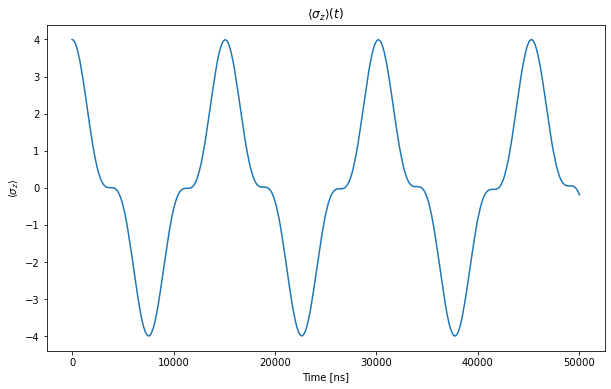

In [7]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(tlist, suma_sz)

ax.set_xlabel(r'Time [ns]')
ax.set_ylabel(r'$\langle \sigma_z \rangle$')
ax.set_title(r'$\langle \sigma_z \rangle (t)$')

In [8]:
suma_sx = [sum(i) for i in zip(*sx)]

Text(0.5, 1.0, '$\\langle \\sigma_x \\rangle (t)$')

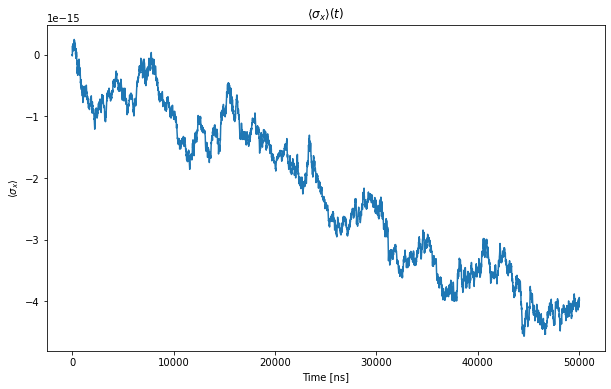

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(tlist, suma_sx)

ax.set_xlabel(r'Time [ns]')
ax.set_ylabel(r'$\langle \sigma_x \rangle$')
ax.set_title(r'$\langle \sigma_x \rangle (t)$')

In [10]:
suma_sy = [sum(i) for i in zip(*sy)]

Text(0.5, 1.0, '$\\langle \\sigma_y \\rangle (t)$')

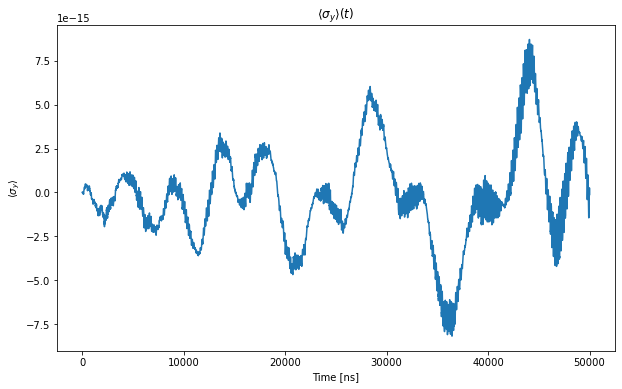

In [11]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(tlist, suma_sy)

ax.set_xlabel(r'Time [ns]')
ax.set_ylabel(r'$\langle \sigma_y \rangle$')
ax.set_title(r'$\langle \sigma_y \rangle (t)$')

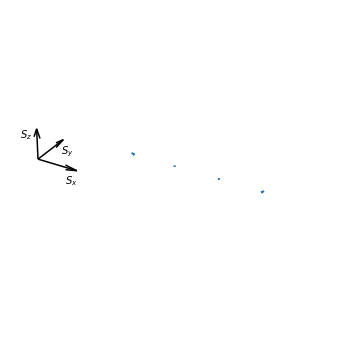

In [12]:
fig = plt.figure(figsize=(6,6))
ax = fig.subplots(subplot_kw=dict(projection="3d"))
ax.quiver(-4,1,-2,1,0,0,color = 'black')
ax.quiver(-4,1,-2,0,1,0,color = 'black')
ax.quiver(-4,1,-2,0,0,1,color = 'black')
ax.text(-2.5,-0.2,-1.4,'$S_x$')
ax.text(-2.5,-0.3,-0.4,'$S_y$')
ax.text(-2.5,-1.7,1,'$S_z$')
def get_arrow(x,i,j):
    y = 0
    z = 0
    u = sx[i][j]
    v = sy[i][j]
    w = sz[i][j]
    return x,y,z,u,v,w

quiver = ax.quiver(*get_arrow(-1,0,0), linewidth = 2.0)
quiver1 = ax.quiver(*get_arrow(0,1,0), linewidth = 2.0)
quiver2 = ax.quiver(*get_arrow(1,2,0), linewidth = 2.0)
quiver3 = ax.quiver(*get_arrow(2,3,0), linewidth = 2.0)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

def update(j):
    global quiver, quiver1, quiver2, quiver3
    quiver.remove()
    quiver = ax.quiver(*get_arrow(-1,0,j), linewidth =2.0)
    quiver1.remove()
    quiver1 = ax.quiver(*get_arrow(0,1,j), linewidth = 2.0)
    quiver2.remove()
    quiver2 = ax.quiver(*get_arrow(1,2,j), linewidth = 2.0)
    quiver3.remove()
    quiver3 = ax.quiver(*get_arrow(2,3,j), linewidth = 2.0)
    
plt.axis('off')
ani = FuncAnimation(fig, update, frames=5000,interval=100)
HTML(ani.to_html5_video())

In [ ]:
#saving the gif
ani.save('animation.gif', writer='imagemagick')